## Kernel-SVM

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

The basic idea behind SVM is the concept of maximum marginal hyperplane.
<img src="https://imagineatness.files.wordpress.com/2011/12/gaussian.png"  style=" margin-left:0px;" />
##### A gaussian function in 3D



Fundamentally we map the data points to higher dimentions and make a hyper plane that seperates the data points and then we map the hyperplane to the dimension of the existing data points. The basic idea behind this, compared to the linear SVM, is to use different kernel functions for seperating the data points. This is done by using different functions like Gaussian, Polynomial or Sigmoidal functions. This can fit data points that are not linearly seperable.

<a id='preprocessing'></a>
### Pre processing

In [2]:
## importing the libraries for simple linear regression.
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
datset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
x = datset.iloc[:, 2:4].values
y = datset.iloc[:, 4].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='building'></a>
### Building the model.
Training the model using SVM library class, [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
This model uses the kernel as rbf as default, here we use linear.

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [14]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

<a id='result'></a>
### Result

In [15]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

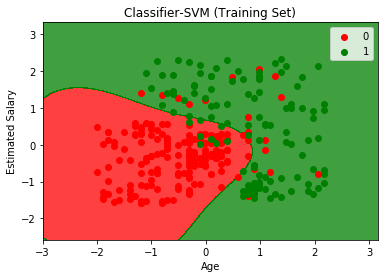

In [16]:
plot_regions(x_train, y_train, 'Classifier-SVM (Training Set)')

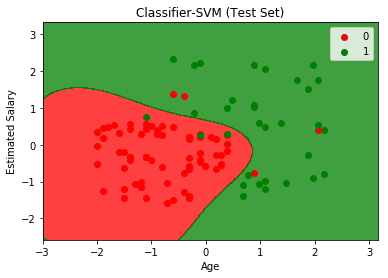

In [23]:
plot_regions(x_test, y_test, 'Classifier-SVM (Test Set)')

##### Conclusion
Here we can see that the Gaussian model performs significantly better compared to the linear SVM classifier from the confusion matrix. Also we can apply other kernels according to the distribution of data.